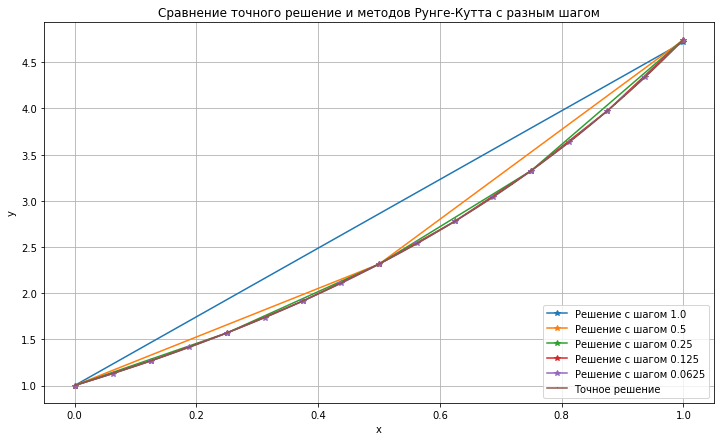

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

def f(x, y):
    return y + x**3 + 1

def exact_solution(x):
    return -x**3 - 3 * x**2 - 6 * x + 8 * math.e**x - 7

plt.figure(figsize=(12, 7))
plt.grid()
number_of_steps = [1, 2, 4, 8, 16]
# границы отрезка, в котором требуется найти решение 
a = 0
b = 1

labels = []
all_values = []

for cur_number_of_steps in number_of_steps:
    values = []
#     согласно уравнению, u(0)=1
    x = 0
    y = 1
    values.append(y)
#     текущий шаг
    h = (b - a) / cur_number_of_steps
    for i in range(cur_number_of_steps):
        phi0 = h * f(x, y)
        phi1 = h * f(x + h / 2, y + phi0 / 2)
        phi2 = h * f(x + h / 2, y + phi1 / 2)
        phi3 = h * f(x + h, y + phi2)
        y = y + (phi0 + 2 * phi1 + 2 * phi2 + phi3) / 6
        x += h
        values.append(y)
    all_values.append(values)
#     генерируем сетку от a до b с шагом (b - a) / cur_number_of_steps
    all_x = np.linspace(a, b, cur_number_of_steps + 1)
    plt.plot(all_x, values, '-*')
    labels.append("Решение с шагом " + str(h))

# сгенерируем график точного решения
all_x = np.linspace(a, b, 1000)
plt.plot(all_x, exact_solution(all_x), '-,')
labels.append("Точное решение")
    
# plt.yscale('log')
plt.title('Сравнение точного решение и методов Рунге-Кутта с разным шагом')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(tuple(labels), loc='lower right')
plt.show()

In [20]:
for i, cur_number_of_steps in enumerate(number_of_steps):
    h = (b - a) / cur_number_of_steps
    print("Результаты при h=", h, sep='')
    points = np.linspace(a, b, cur_number_of_steps + 1)
    for x, y in zip(points, all_values[i]):
        print("\t\tu({:f}) = {:f}, тогда как точное решение равно {:f}".format(x, y, exact_solution(x)))

Результаты при h=1.0
		u(0.000000) = 1.000000, тогда как точное решение равно 1.000000
		u(1.000000) = 4.718750, тогда как точное решение равно 4.746255
Результаты при h=0.5
		u(0.000000) = 1.000000, тогда как точное решение равно 1.000000
		u(0.500000) = 2.313965, тогда как точное решение равно 2.314770
		u(1.000000) = 4.743626, тогда как точное решение равно 4.746255
Результаты при h=0.25
		u(0.000000) = 1.000000, тогда как точное решение равно 1.000000
		u(0.250000) = 1.569054, тогда как точное решение равно 1.569078
		u(0.500000) = 2.314710, тогда как точное решение равно 2.314770
		u(0.750000) = 3.326509, тогда как точное решение равно 3.326625
		u(1.000000) = 4.746051, тогда как точное решение равно 4.746255
Результаты при h=0.125
		u(0.000000) = 1.000000, тогда как точное решение равно 1.000000
		u(0.125000) = 1.266359, тогда как точное решение равно 1.266359
		u(0.250000) = 1.569077, тогда как точное решение равно 1.569078
		u(0.375000) = 1.915319, тогда как точное решение равн

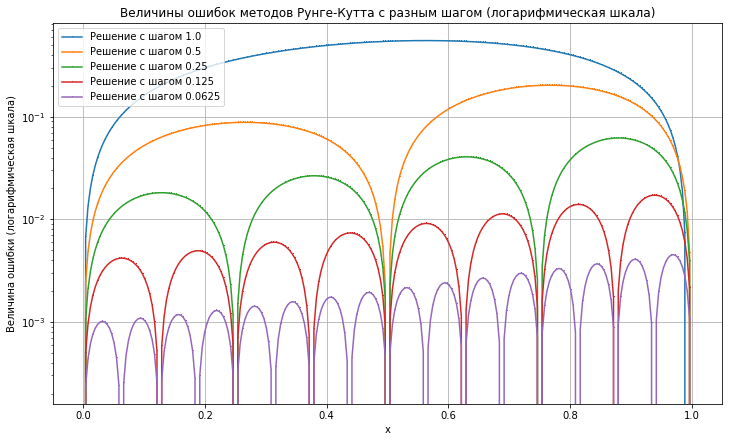

In [27]:
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')

total_number_of_points = 257

def densify(x, number_of_steps):
    res = np.empty((0,))
    number_of_points_in_interval = (total_number_of_points - 1) / number_of_steps
    h = (b - a) / cur_number_of_steps
    for i in range(number_of_steps):
        left = x[i]
        right = x[i + 1]
        densified = np.linspace(left, right, number_of_points_in_interval + 1)
        res = np.hstack((res, densified[:-1]))
        if i + 1 == number_of_steps:
            res = np.append(res, densified[-1])
    return res

plt.figure(figsize=(12, 7))
plt.grid()
MSE_values = []
MAE_values = []
all_x = np.linspace(a, b, total_number_of_points)
for i, cur_number_of_steps in enumerate(number_of_steps):
    densified_x = densify(all_values[i], cur_number_of_steps)
    MSE_values.append(mean_squared_error(densified_x, exact_solution(all_x)))
    MAE_values.append(mean_absolute_error(densified_x, exact_solution(all_x)))
    errors = densified_x - exact_solution(all_x)
    plt.plot(all_x, errors, '-,')
plt.title('Величины ошибок методов Рунге-Кутта с разным шагом (логарифмическая шкала)')
plt.xlabel('x')
plt.ylabel('Величина ошибки (логарифмическая шкала)')
plt.legend(tuple(labels), loc='upper left')
plt.yscale('log')
plt.show()

In [5]:
for i, cur_number_of_steps in enumerate(number_of_steps):
    h = (b - a) / cur_number_of_steps
    print("При h={:f} MSE равно: {:f}, MAE равно {:f}".format(h, MSE_values[i], MAE_values[i]))

При h=1.000000 MSE равно: 0.159772, MAE равно 0.362017
При h=0.500000 MSE равно: 0.012945, MAE равно 0.096274
При h=0.250000 MSE равно: 0.000869, MAE равно 0.024471
При h=0.125000 MSE равно: 0.000055, MAE равно 0.006141
При h=0.062500 MSE равно: 0.000003, MAE равно 0.001532
